In [0]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [0]:
freq_dic={}
col_dic={}

def preprocess(name):
    
    df = pd.read_csv(name)
    df.drop(['Ticket','PassengerId'], 1, inplace=True)
    
    for i in range(len(df)):
        dtlower=df["Name"][i].lower()
        
        if('mrs' in dtlower):
            df["Name"][i]="Mrs"
        elif ('mr' in dtlower):
            df["Name"][i]="Mr"
        elif ('miss' in dtlower):
            df["Name"][i]="Miss"
        elif ('master' in dtlower):
            df["Name"][i]="Master"
        else:
            df["Name"][i]="None"
            
    for i in range(len(df)):
        cablow=str(df['Cabin'][i]).lower()

        if('nan' in cablow):
            df["Cabin"][i]="Z"
        elif ('a' in cablow):
            df["Cabin"][i]="A"
        elif ('b' in cablow):
            df["Cabin"][i]="B"
        elif ('c' in cablow):
            df["Cabin"][i]="C"
        elif ('d' in cablow):
            df["Cabin"][i]="D"
        elif ('e' in cablow):
            df["Cabin"][i]="E"
        elif ('f' in cablow):
            df["Cabin"][i]="F"
        elif ('t' in cablow):
            df["Cabin"][i]="T"
        elif ('g' in cablow):
            df["Cabin"][i]="G"
        else:    
            df["Cabin"][i]="Z"   
 
            
    df_nan=df.copy()
    df.dropna(inplace=True)

    columns = df.columns.values

    for column in columns:
        y=df[column].value_counts().idxmax()
        freq_dic[column]=y
        df_nan[column].fillna(y, inplace = True) 
        
    print('\nHandling non numerical data---------------------\n')
    
    for column in columns:
        if not (np.issubdtype(df_nan[column].dtype, np.number)):
            dict_tocategory={}
            column_contents = df_nan[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                dict_tocategory[unique]=x
                x+=1

            print(dict_tocategory)
            for i in range(len(column_contents)):
                column_contents[i]=dict_tocategory[column_contents[i]]

            df_nan[column]=column_contents
            col_dic[column]=dict_tocategory
            
    df_nan['Family_Size']=df_nan['SibSp']+df_nan['Parch']
    df_nan['Age_Class']=df_nan['Age']*df_nan['Pclass']
    df_nan['Fare_Per_Person']=df_nan['Fare']/(df_nan['Family_Size']+1)
    
    #df_nan['Fare']=df_nan['Fare'].astype(int, inplace=True)
    #df_nan['Age']=(df_nan['Age']/5).astype(int, inplace=True)
    return df_nan

In [0]:
df=preprocess('train.csv')
print(df.shape)
df


Handling non numerical data---------------------

{'Mr': 0, 'None': 1, 'Master': 2, 'Miss': 3, 'Mrs': 4}
{'female': 0, 'male': 1}
{'T': 0, 'Z': 1, 'G': 2, 'F': 3, 'E': 4, 'A': 5, 'D': 6, 'B': 7, 'C': 8}
{'S': 0, 'Q': 1, 'C': 2}
(891, 13)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Age_Class,Fare_Per_Person
0,0,3,0,1,22.00,1,0,7.2500,1,0,1,66.00,3.625000
1,1,1,4,0,38.00,1,0,71.2833,8,2,1,38.00,35.641650
2,1,3,3,0,26.00,0,0,7.9250,1,1,0,78.00,7.925000
3,1,1,4,0,35.00,1,0,53.1000,8,0,1,35.00,26.550000
4,0,3,0,1,35.00,0,0,8.0500,1,0,0,105.00,8.050000
5,0,3,0,1,24.00,0,0,8.4583,1,1,0,72.00,8.458300
6,0,1,0,1,54.00,0,0,51.8625,4,0,0,54.00,51.862500
7,0,3,2,1,2.00,3,1,21.0750,1,0,4,6.00,4.215000
8,1,3,4,0,27.00,0,2,11.1333,1,0,2,81.00,3.711100
9,1,2,4,0,14.00,1,0,30.0708,1,2,1,28.00,15.035400


In [0]:
print(list(df.columns))

['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Age_Class', 'Fare_Per_Person']


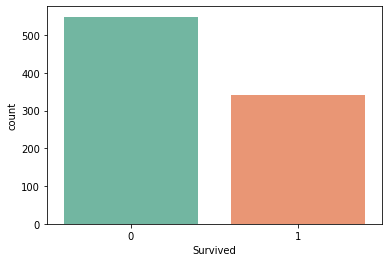

In [0]:
ax1 = sb.countplot(x='Survived', data=df, palette='Set2')   #'pallete' is 'colormap' in matplotlib

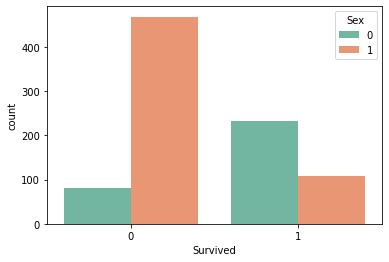

In [0]:
ax2 = sb.countplot(x='Survived', hue='Sex',data=df, palette='Set2')   #'pallete' is 'colormap' in matplotlib

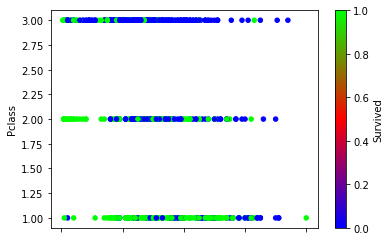

In [0]:
#assign object?
ax1_=df.plot(x='Age', y='Pclass', c='Survived',kind='scatter', colormap='brg')

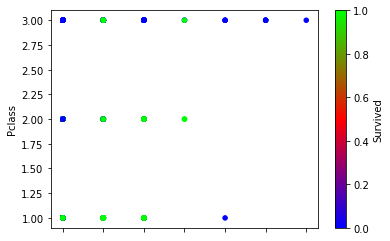

In [0]:
#assign object?
ax1_=df.plot(x='Parch', y='Pclass', c='Survived',kind='scatter', colormap='brg')

In [0]:
df2=pd.crosstab(df.Embarked, df.Survived)                   #returns a dataframe
print(df2)

Survived    0    1
Embarked          
0         427  218
1         47   31 
2         75   93 


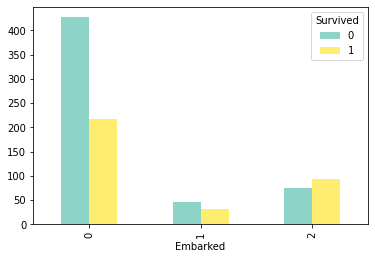

In [0]:
df2.plot(kind='bar', colormap='Set3')

In [0]:
df=df.sample(frac=1)

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_train=df.drop(['Survived'],1)
Y_train=df['Survived']

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)


Decision trees and Random Forests do not require feature scaling

# GridSearch

GridSearch automatically uses K Fold validation uses X_train as both train and validation set in cv=5 cycles

In [0]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = SVC(random_state=0,gamma='auto')

# Choose some parameter combinations to try
parameters = {
              'C':[1.0, 2.0, 0.5],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'degree':[1,2,3,4,5]
             }

In [0]:
# Run the grid search
grid_obj = GridSearchCV(clf, parameters, cv=5)
grid_obj = grid_obj.fit(X_train_std, Y_train)

# Set the clf to the best combination of hyper parameters
clf = grid_obj.best_estimator_

# again Fit the best algorithm to the data. 
clf.fit(X_train_std, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)
pd.DataFrame(grid_obj.cv_results_).loc[:,['params','mean_test_score','rank_test_score']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,params,mean_test_score,rank_test_score
0,"{'C': 1.0, 'degree': 1, 'kernel': 'linear'}",0.818241,19
1,"{'C': 1.0, 'degree': 1, 'kernel': 'poly'}",0.796912,37
2,"{'C': 1.0, 'degree': 1, 'kernel': 'rbf'}",0.820495,14
3,"{'C': 1.0, 'degree': 1, 'kernel': 'sigmoid'}",0.709309,51
4,"{'C': 1.0, 'degree': 2, 'kernel': 'linear'}",0.818241,19
5,"{'C': 1.0, 'degree': 2, 'kernel': 'poly'}",0.811493,35
6,"{'C': 1.0, 'degree': 2, 'kernel': 'rbf'}",0.820495,14
7,"{'C': 1.0, 'degree': 2, 'kernel': 'sigmoid'}",0.709309,51
8,"{'C': 1.0, 'degree': 3, 'kernel': 'linear'}",0.818241,19
9,"{'C': 1.0, 'degree': 3, 'kernel': 'poly'}",0.823853,1


When submitting use whole of the train.csv as X_train in gridsearchCV as it accounds it as both CV and Training Set

In [0]:
clf.score(X_train_std,Y_train)

0.8406285072951739

In [0]:
def testdata():
    
    df = pd.read_csv('test.csv')    
    df.drop(['Ticket','PassengerId'], 1, inplace=True)
    columns = df.columns.values
    
    for i in range(len(df)):
        dtlower=df["Name"][i].lower()
        
        if('mrs' in dtlower):
            df["Name"][i]="Mrs"
        elif ('mr' in dtlower):
            df["Name"][i]="Mr"
        elif ('miss' in dtlower):
            df["Name"][i]="Miss"
        elif ('master' in dtlower):
            df["Name"][i]="Master"
        else:
            df["Name"][i]="None"
    
    for i in range(len(df)):
        cablow=str(df['Cabin'][i]).lower()

        if('nan' in cablow):
            df["Cabin"][i]="Z"
        elif ('a' in cablow):
            df["Cabin"][i]="A"
        elif ('b' in cablow):
            df["Cabin"][i]="B"
        elif ('c' in cablow):
            df["Cabin"][i]="C"
        elif ('d' in cablow):
            df["Cabin"][i]="D"
        elif ('e' in cablow):
            df["Cabin"][i]="E"
        elif ('f' in cablow):
            df["Cabin"][i]="F"
        elif ('t' in cablow):
            df["Cabin"][i]="T"
        elif ('g' in cablow):
            df["Cabin"][i]="G"
        else:    
            df["Cabin"][i]="Z"  
            
   
   
    for column in columns:
        df[column].fillna(freq_dic[column], inplace = True) 
        
    print('\nHandling non numerical data---------------------\n')
    
    for column in columns:
        if not (np.issubdtype(df[column].dtype, np.number)):
            dict_tocategory=col_dic[column]     
            column_contents = df[column].values.tolist()   
            print(dict_tocategory)
            for i in range(len(column_contents)):
                column_contents[i]=dict_tocategory[column_contents[i]]

            df[column]=column_contents

    df['Family_Size']=df['SibSp']+df['Parch']
    df['Age_Class']=df['Age']*df['Pclass']
    df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)
    
    
    return df

In [0]:
X_test=testdata()
X_test_std = std_scale.transform(X_test)


Handling non numerical data---------------------

{'Mr': 0, 'None': 1, 'Master': 2, 'Miss': 3, 'Mrs': 4}
{'female': 0, 'male': 1}
{'T': 0, 'Z': 1, 'G': 2, 'F': 3, 'E': 4, 'A': 5, 'D': 6, 'B': 7, 'C': 8}
{'S': 0, 'Q': 1, 'C': 2}


In [0]:
X_test_std.shape

(418, 12)

In [0]:
X_test_std

array([[ 0.82737724, -0.80032591,  0.73769513, ..., -0.56097483,
         1.30368267, -0.33743135],
       [ 0.82737724,  1.65860645, -1.35557354, ...,  0.05915988,
         2.48240538, -0.45828736],
       [-0.36936484, -0.80032591,  0.73769513, ..., -0.56097483,
         1.94805108, -0.28555416],
       ...,
       [ 0.82737724, -0.80032591,  0.73769513, ..., -0.56097483,
         1.68087394, -0.35360057],
       [ 0.82737724, -0.80032591,  0.73769513, ..., -0.56097483,
         0.31355559, -0.33126739],
       [ 0.82737724,  0.42914027,  0.73769513, ...,  0.67929458,
         0.31355559, -0.34794004]])

In [0]:
result=clf.predict(X_test_std)
result

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
dfsubmit = pd.read_csv('gs.csv')    
dfsubmit['Survived']=result
dfsubmit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [0]:
dfsubmit.to_csv('result.csv',header=True, index=False)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [0]:
clf.predict([X_test.loc[8,:]])

array([0])

In [0]:
X_test.loc[0,:]

Pclass             3.0000  
Name               0.0000  
Sex                1.0000  
Age                34.5000 
SibSp              0.0000  
Parch              0.0000  
Fare               7.8292  
Cabin              1.0000  
Embarked           1.0000  
Family_Size        0.0000  
Age_Class          103.5000
Fare_Per_Person    7.8292  
Name: 0, dtype: float64